
# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [1]:
import pandas as pd
data = pd.read_excel('data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

In [2]:
data.head(5)

,Номер заказа,Канал продаж,Продуктовый сегмент,Менеджер,Название заказа,Продавец,Город,"Продажи факт, тыс.руб","Продажи план, тыс.руб",Дата сделки,Дата оплаты,Дней между сделкой и оплатой,Статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1,Закрыто
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87,Закрыто


# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

1. Замена названий столбцов.
Видно, что названия не соответствуют привычному виду, приводим их к нижнему регистру, вместо пробелов ставим нижнее подчеркивание, а в названиях с запятыми убираем их. 

In [3]:
data.columns

Index(['Номер заказа', 'Канал продаж', 'Продуктовый сегмент', 'Менеджер',
       'Название заказа', 'Продавец', 'Город', 'Продажи факт, тыс.руб',
       'Продажи план, тыс.руб', 'Дата сделки', 'Дата оплаты',
       'Дней между сделкой и оплатой', 'Статус'],
      dtype='object')

In [4]:
new_columns = []
for column in data.columns:
    new_columns.append(column.lower().replace(' ', '_'))
data.columns = new_columns

In [5]:
data.rename(columns = {'продажи_факт,_тыс.руб' : 'продажи_факт_тыс.руб', 'продажи_план,_тыс.руб' : 'продажи_план_тыс.руб'}, inplace = True)

In [6]:
data.columns

Index(['номер_заказа', 'канал_продаж', 'продуктовый_сегмент', 'менеджер',
       'название_заказа', 'продавец', 'город', 'продажи_факт_тыс.руб',
       'продажи_план_тыс.руб', 'дата_сделки', 'дата_оплаты',
       'дней_между_сделкой_и_оплатой', 'статус'],
      dtype='object')

2. Проверка на пропущенные значения. Видно, что пропущенные значения находятся в столбце "дата оплаты". Так как сделка состоялась и нам нужен анализ выполнения плана продаж в целом, не корректно было бы удалять строки с пропущенными значениями в этом столбце, потому что они не дают главную характеристику по продажам. Пропущенные значения могут быть связаны с техническими ошибками, ошибками ввода данных,  отсутствием информации по данному пункту. Поэтому заполняем пропущенные значения нулями в формате даты.

In [7]:
data.isna().sum()

номер_заказа                     0
канал_продаж                     0
продуктовый_сегмент              0
менеджер                         0
название_заказа                  0
продавец                         0
город                            0
продажи_факт_тыс.руб             0
продажи_план_тыс.руб             0
дата_сделки                      0
дата_оплаты                     23
дней_между_сделкой_и_оплатой     0
статус                           0
dtype: int64

In [8]:
data['дата_оплаты'] = data['дата_оплаты'].fillna('0000-00-00')

3. Замена типов данных. После заполнения пропущенных значений в столбце "дата оплаты", тип данных в нём изменился. Поменяем обратно на тип данных даты для того, чтобы в последующем можно было проводить различные операции в соответствии с этим типом данных, например смотреть промежуточные результаты. Также поменяем тип данных в столбце "дней_между_сделкой_и_оплатой", чтобы можно было проводить со значениями в этом слобце математические операции.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   номер_заказа                  116 non-null    int64         
 1   канал_продаж                  116 non-null    object        
 2   продуктовый_сегмент           116 non-null    object        
 3   менеджер                      116 non-null    object        
 4   название_заказа               116 non-null    object        
 5   продавец                      116 non-null    object        
 6   город                         116 non-null    object        
 7   продажи_факт_тыс.руб          116 non-null    int64         
 8   продажи_план_тыс.руб          116 non-null    int64         
 9   дата_сделки                   116 non-null    datetime64[ns]
 10  дата_оплаты                   116 non-null    object        
 11  дней_между_сделкой_и_оплатой  11

In [10]:
data['дата_оплаты'] = pd.to_datetime(data['дата_оплаты'], errors = 'coerce')
data['дней_между_сделкой_и_оплатой'] = pd.to_numeric(data['дней_между_сделкой_и_оплатой'], errors = 'coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   номер_заказа                  116 non-null    int64         
 1   канал_продаж                  116 non-null    object        
 2   продуктовый_сегмент           116 non-null    object        
 3   менеджер                      116 non-null    object        
 4   название_заказа               116 non-null    object        
 5   продавец                      116 non-null    object        
 6   город                         116 non-null    object        
 7   продажи_факт_тыс.руб          116 non-null    int64         
 8   продажи_план_тыс.руб          116 non-null    int64         
 9   дата_сделки                   116 non-null    datetime64[ns]
 10  дата_оплаты                   93 non-null     datetime64[ns]
 11  дней_между_сделкой_и_оплатой  93

4. Подсчет суммарных фактических продаж по каждому городу

In [12]:
data['суммарные_фактические_продажи'] = data.groupby('город')['продажи_факт_тыс.руб'].transform('sum')

In [13]:
data.head(5)

,номер_заказа,канал_продаж,продуктовый_сегмент,менеджер,название_заказа,продавец,город,продажи_факт_тыс.руб,продажи_план_тыс.руб,дата_сделки,дата_оплаты,дней_между_сделкой_и_оплатой,статус,суммарные_фактические_продажи
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52.0,Закрыто,1370
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15.0,Закрыто,1370
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,NaN,В процессе,1370
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1.0,Закрыто,1370
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87.0,Закрыто,7680


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле. 

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

1. Помесячная динамика выполнения плана. Сгруппировали таблицу по фактической прибыли и месяцу  и добавили столбец "выполнение плана", чтобы посмотреть, выполнен ли план по продажам в определенном месяце по прибыли (0 - не выполнен, 1 - выполнен). Из сгруппированной таблицы видно, что больше всего прибыли было получено в январе и есть просадки в апреле, июне, где продажи падают больше, чем на пятьдесят тысяч, в августе вообще не было сделок, а в остальные месяцы года продажи составляют меньше миллиона рублей. При этом план часто не выполняется, с каждым месяцем всё больше.

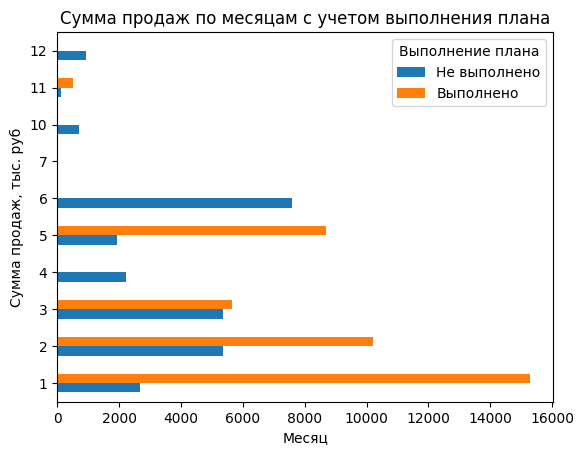

In [28]:
import matplotlib.pyplot as plt
data['выполнение_плана'] = data['продажи_факт_тыс.руб'] >= data['продажи_план_тыс.руб']
data['выполнение_плана'] = data['выполнение_плана'].astype(int)
monthly_sales = data.groupby([data['дата_сделки'].dt.month, 'выполнение_плана'])['продажи_факт_тыс.руб'].sum()
monthly_sales.unstack().plot(kind = 'barh')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж, тыс. руб')
plt.title('Сумма продаж по месяцам с учетом выполнения плана')
plt.legend(title='Выполнение плана', labels=['Не выполнено', 'Выполнено'])
plt.show()

2. Продажи по продуктовым сегментам. По отсортированной таблице видно, что больше всего дохода приносит оборудование и товары из категории "Другое". Меньше всего - игрушки, косметика и товары категории "Охота и рыбалка", продажи которых вообще равны нулю.

In [15]:
product_sales = data.groupby('продуктовый_сегмент')['продажи_факт_тыс.руб'].sum()
product_sales.sort_values(ascending=False)

продуктовый_сегмент
Оборудование              35099
Другое                     7225
Свет                       6950
Ткань и аксессуары         5712
Одежда                     4650
Электронные устройства     2130
Бассейн                    1500
Сувениры                    970
Спорт товары                750
Автозапчасти                700
Упаковка                    675
Медецина                    400
Игрушки                     250
Косметика                   200
Охота и рыбалка               0
Name: продажи_факт_тыс.руб, dtype: int64

3. Сегменты с наибольшими суммарными продажами и распределение по месяцам. Товары из категории "Другое" занимают лидирующие позиции в первые месяцы года, и с каждым месяцем их продают всё меньше и меньше, также как и товары из категории "Одежда", начиная с июня, их вообще не продают. При этом товары из категориии "Свет" с каждым месяцем поднимаются всё выше.

In [16]:
top_segments = product_sales.nlargest(5)

In [17]:
top_segments_sales = data[data['продуктовый_сегмент'].isin(top_segments .index)]
monthly_sales_top_segments = top_segments_sales.groupby([top_segments_sales['дата_оплаты'].dt.month, 'продуктовый_сегмент'])['продажи_факт_тыс.руб'].sum()

In [18]:
monthly_sales_top_segments_sorted = monthly_sales_top_segments.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))
monthly_sales_top_segments_sorted

дата_оплаты  продуктовый_сегмент
1.0          Одежда                  3900
             Другое                  1250
             Оборудование            1090
             Ткань и аксессуары       760
2.0          Оборудование            6114
             Другое                  4525
             Свет                     200
             Ткань и аксессуары       180
3.0          Оборудование            5560
             Свет                    4300
             Ткань и аксессуары      2780
             Одежда                   300
             Другое                   250
4.0          Оборудование            5055
             Другое                  1200
             Ткань и аксессуары      1062
             Свет                     700
5.0          Свет                    1750
             Ткань и аксессуары       930
             Одежда                   450
6.0          Оборудование           17280
Name: продажи_факт_тыс.руб, dtype: int64

4. География продаж. Больше всего продаж в городах Челябинск и Казань, а в Севастопале, Ставрополе, Липецке и Ярославле продажи равны нулю. 

In [19]:
city_sales = data.groupby('город')['продажи_факт_тыс.руб'].sum().sort_values(ascending=False)
city_sales

город
Челябинск          8700
Казань             8040
Магнитогорск       7680
Сочи               6950
Новосибирск        5725
Самара             5574
Уфа                4350
Волгоград          4250
Москва             3717
Оренбург           2750
Тула               1850
Нижний Новгород    1635
Кемерово           1500
Санкт-Петербург    1370
Улан-Удэ            970
Пермь               770
Курск               700
Саратов             430
Омск                250
Севастополь           0
Стоврополь            0
Липецк                0
Ярославль             0
Name: продажи_факт_тыс.руб, dtype: int64

5. Сравнение выполнение плана по каналам продаж. Больше всего выполнению плана соответствуют каналы "Холодный звонок" и "Рекомендация". С небольшим отрывом выполняют планы по каналам "Выставка и "Почта", по каналам "Вебсайт" и "Контекстная реклама" вообще планы не выполняются. Канал "Рекомендация" имеет конверсию выше 1, что может означать, что в этом канале фактические продажи превышают плановые. Каналы "Почта", "Вебсайт", "Контекстная реклама" имеют более низкую конверсию. Канал "Почта" и "Холодный звонок" имеют более высокие средние длительности сделки - 57 и 44 дня соответственно, канал "Выставка" имеет одну из самых низких средних длительностей сделки - примерно 9 дней. 

In [20]:
plan_completion_by_channel = data.groupby('канал_продаж')['выполнение_плана'].mean().sort_values(ascending=False)
plan_completion_by_channel

канал_продаж
Холодный звонок        0.363636
Рекомендация           0.343750
Выставка               0.277778
Почта                  0.250000
Вебсайт                0.000000
Контекстная реклама    0.000000
Name: выполнение_плана, dtype: float64

In [21]:
conversion_by_channel = data.groupby('канал_продаж').apply(lambda x: x['продажи_факт_тыс.руб'].sum() / x['продажи_план_тыс.руб'].sum()).sort_values(ascending=False)
conversion_by_channel


C:\Users\konst\AppData\Local\Temp\ipykernel_9680\188204090.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_by_channel = data.groupby('канал_продаж').apply(lambda x: x['продажи_факт_тыс.руб'].sum() / x['продажи_план_тыс.руб'].sum()).sort_values(ascending=False)


канал_продаж
Рекомендация           1.060882
Выставка               0.806873
Холодный звонок        0.806769
Почта                  0.442857
Вебсайт                0.400000
Контекстная реклама    0.350000
dtype: float64

In [22]:
deal_duration_by_channel = data.groupby('канал_продаж')['дней_между_сделкой_и_оплатой'].mean().sort_values(ascending=False)
deal_duration_by_channel

канал_продаж
Почта                  57.000000
Холодный звонок        44.033333
Контекстная реклама    29.800000
Рекомендация           26.440000
Вебсайт                20.000000
Выставка                9.214286
Name: дней_между_сделкой_и_оплатой, dtype: float64

# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

Рекомендуется профилировать менеджеров по товарам и каналам продаж, где они показывают лучшие результаты. Например, если менеджер успешно закрывает сделки по категории "Оборудование" или через канал "Холодный звонок", то стоит уделить им больше задач в этих областях, такая стратегия может быть более эффективна с точки зрения прибыли и быстрого завершения сделок.
Следует рассмотреть возможность расширения деятельности в наиболее доходных каналах продаж, таких как "Холодный звонок" и "Рекомендация", где планы чаще всего выполняются.
Также стоит обратить внимание на регионы с высоким спросом, такие как Челябинск и Казань, и рассмотреть возможность увеличения доли продаж в этих городах.
